In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
#df = pd.read_csv('eng-rus.txt', sep='\t', header=None).drop(2, axis=1)

In [9]:
sub = pd.read_csv("/content/drive/My Drive/Colab Notebooks/otus/MLA/AutoML/sample_submission.csv.zip")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/otus/MLA/AutoML/test.csv.zip")
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/otus/MLA/AutoML/train.csv.zip")

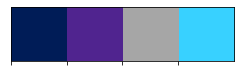

In [5]:
colors = ['#001c57','#50248f','#a6a6a6','#38d1ff']
sns.palplot(sns.color_palette(colors))

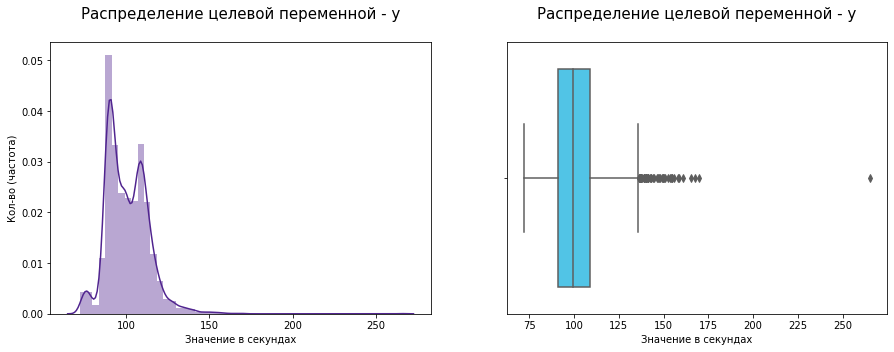

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(train.y.values, bins=50, color=colors[1])
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.xlabel('Значение в секундах'); plt.ylabel('Кол-во (частота)');

plt.subplot(122)
sns.boxplot(train.y.values, color=colors[3])
plt.title('Распределение целевой переменной - y\n',fontsize=15)
plt.xlabel('Значение в секундах');

In [10]:
test.head(4)

AttributeError: ignored

   ID  X0 X1  X2 X3 X4 X5 X6  ... X377  X378  X379  X380  X382  X383  X384  X385
0   1  az  v   n  f  d  t  a  ...    0     1     0     0     0     0     0     0
1   2   t  b  ai  a  d  b  g  ...    1     0     0     0     0     0     0     0
2   3  az  v  as  f  d  a  j  ...    0     1     0     0     0     0     0     0
3   4  az  l   n  f  d  z  l  ...    0     1     0     0     0     0     0     0

[4 rows x 377 columns]

In [7]:
sub.head(6)

,ID,y
0,1,100.669318
1,2,100.669318
2,3,100.669318
3,4,100.669318
4,5,100.669318
5,8,100.669318


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [9]:
dtype_df = train.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,369
1,float64,1
2,object,8


In [10]:
train.dtypes[train.dtypes=='float']

y    float64
dtype: object

In [11]:
train.dtypes[train.dtypes=='object']

X0    object
X1    object
X2    object
X3    object
X4    object
X5    object
X6    object
X8    object
dtype: object

In [12]:
obj = train.dtypes[train.dtypes=='object'].index
for i in obj:
    print(i, train[i].unique())

X0 ['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
X1 ['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
X2 ['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
X3 ['a' 'e' 'c' 'f' 'd' 'b' 'g']
X4 ['d' 'b' 'c' 'a']
X5 ['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
X6 ['j' 'l' 'd' 'h' 'i' 'a' 'g' 'c' 'k' 'e' 'f' 'b']
X8 ['o' 'x' 'e' 'n' 's' 'a' 'h' 'p' 'm' 'k' 'd' 'i' 'v' 'j' 'b' 'q' 'w' 'g'
 'y' 'l' 'f' 'u' 'r' 't' 'c']


Пропущенные значения

In [13]:
train.isna().sum()[train.isna().sum()>0]

Series([], dtype: int64)

Категориальные переменные

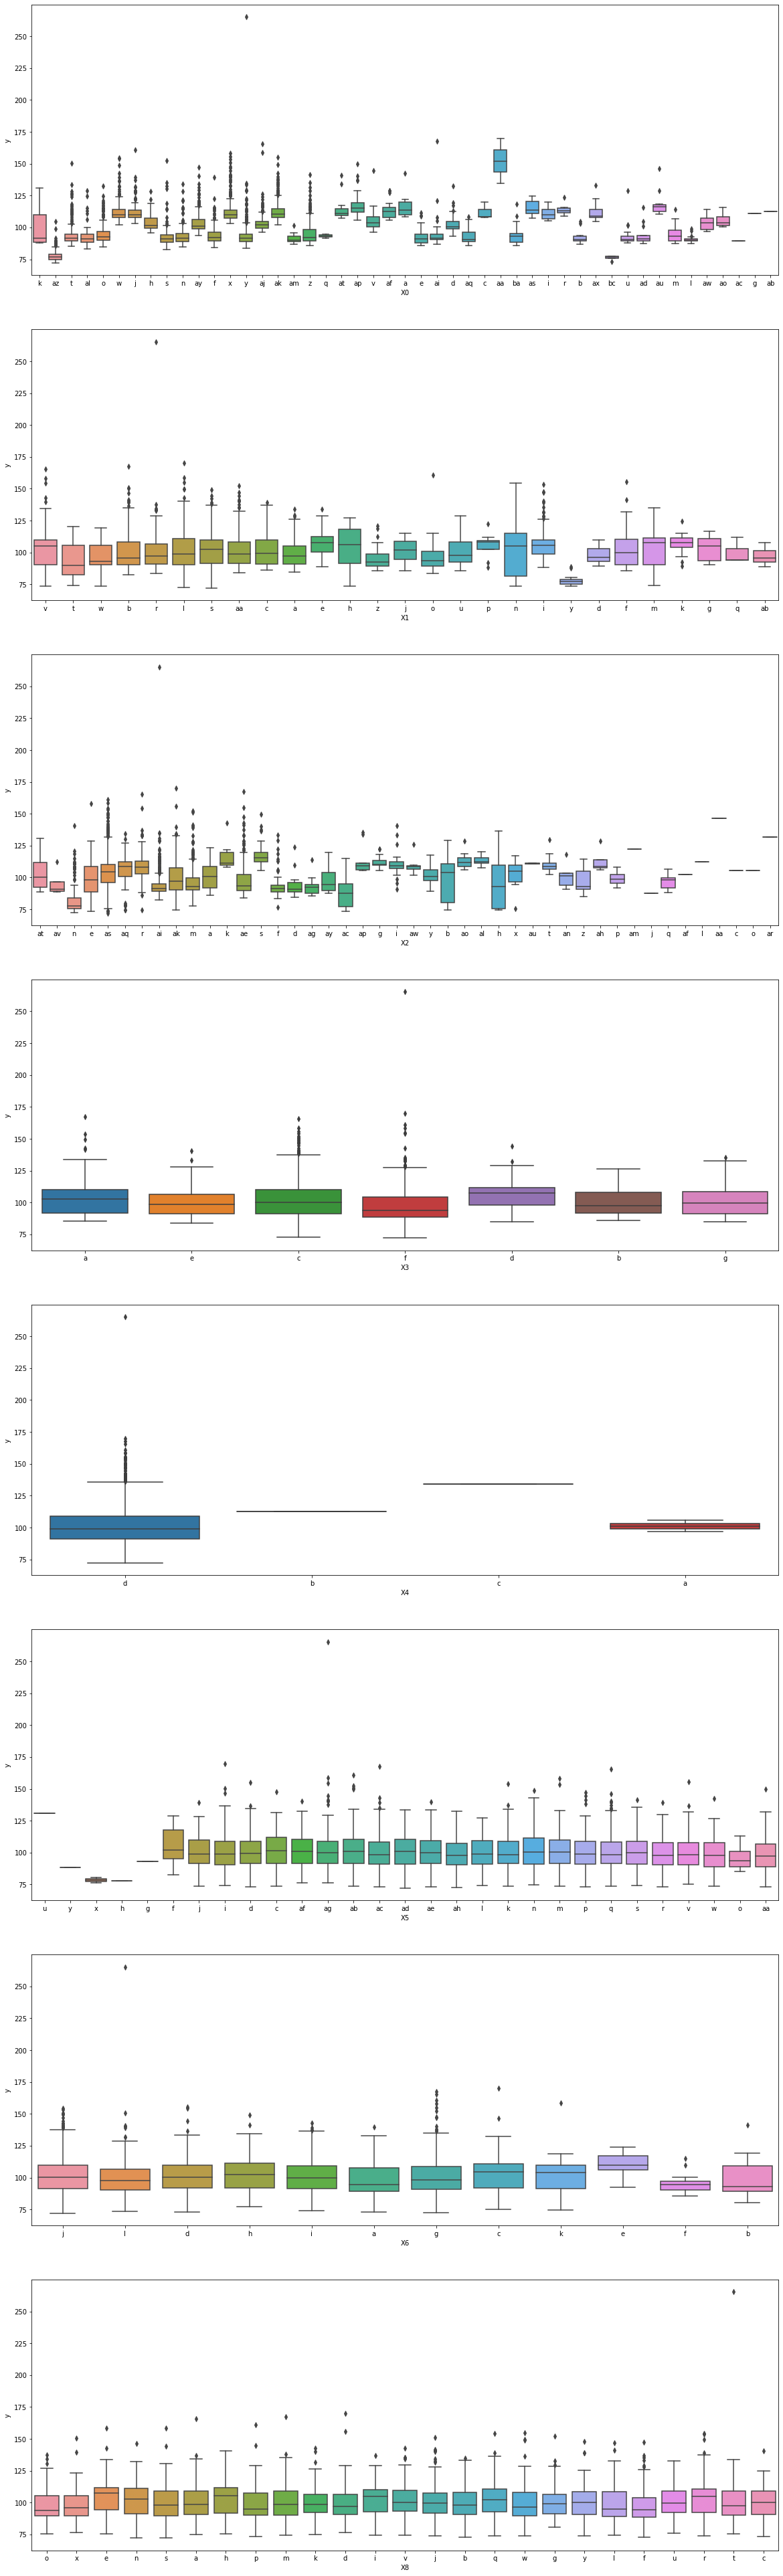

In [14]:
fig,ax = plt.subplots(len(obj), figsize=(20,70))

for i, col in enumerate(obj):
    sns.boxplot(x=col, y='y', data=train, ax=ax[i])

Числовые переменные

In [15]:
num = train.dtypes[train.dtypes=='int64'].index[1:]

In [16]:
num

Index(['X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=368)

Мы имеем набор числовых переменных, где значение задано 1, либо 0, поэтому нет необходимости проводить объемный ананлиз. В данном случае нам должно быть интересно, меняется ли значение показателей внутри переменных, для этого исследуем дисперсию данных переменных, используем при этом функцию var(), и выберем только те, где дисперсия нулевая (то есть всегда 0, либо 1 на всем датасете в разрезе переменной)



In [17]:
nan_num = []
for i in num:
    if (train[i].var()==0):
        print(i, train[i].var())
        nan_num.append(i)

X11 0.0
X93 0.0
X107 0.0
X233 0.0
X235 0.0
X268 0.0
X289 0.0
X290 0.0
X293 0.0
X297 0.0
X330 0.0
X347 0.0


In [18]:
train['X11'].unique(), train['X347'].unique()

(array([0]), array([0]))

In [19]:
train['X100'].unique(), train['X100'].value_counts()

(array([0, 1]), 1    2905
 0    1304
 Name: X100, dtype: int64)

По-хорошему такие фичи можно и дропнуть, но поскольку мы сравниваем подходы из коробы с AutoML, пусть будет честный бой и оставим, как есть.    
Попробую дропнуть эти фичи, а то сколько раз пытался запустить AutoML он даёт сбой.

In [20]:
#train = train.drop(columns=nan_num, axis=1)

_________________

In [20]:
train["set"] = "train"
train.loc[(train['ID'] > 6000), 'set'] = 'va'
train

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,set
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,train
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,train
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,train
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,va
4205,8406,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,va
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,va
4207,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,va


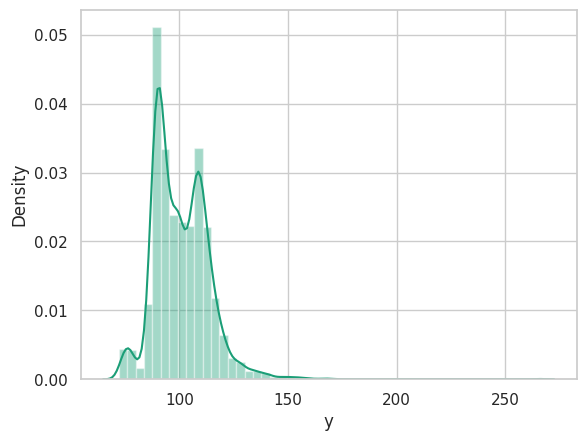

In [21]:
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Dark2')

sns.distplot(train.y)

Начнём объединять данные в один датасет, и добавим ещё валидационные данные, из тренировочных.

In [22]:
test["set"] = "test"
test_id = test.ID

In [23]:
data_all = pd.DataFrame()
data_all = pd.concat([train,test])
data_all = data_all.sort_values(by='ID', ascending=True)
#data_all = data_all.drop(columns = "ID")
data_all = data_all.reset_index(drop=True)
data_all

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,set
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train
1,1,NaN,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,test
2,2,NaN,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,test
3,3,NaN,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,test
4,4,NaN,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,8413,NaN,y,v,as,f,d,aa,d,w,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,test
8414,8414,NaN,ak,v,as,a,d,aa,c,q,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,test
8415,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,va
8416,8416,NaN,t,aa,ai,c,d,aa,g,r,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,test


In [24]:
obj

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [25]:
enc = data_all[obj]
enc

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,az,v,n,f,d,t,a,w
2,t,b,ai,a,d,b,g,y
3,az,v,as,f,d,a,j,j
4,az,l,n,f,d,z,l,n
...,...,...,...,...,...,...,...,...
8413,y,v,as,f,d,aa,d,w
8414,ak,v,as,a,d,aa,c,q
8415,al,r,e,f,d,aa,l,u
8416,t,aa,ai,c,d,aa,g,r


### LabelEncoding

In [26]:
from sklearn.preprocessing import LabelEncoder #Library for LabelEncoding

for c in enc:
    le = LabelEncoder()
    le.fit(enc[c])
    enc[c] = le.transform(enc[c])
    
enc

,X0,X1,X2,X3,X4,X5,X6,X8
0,37,23,20,0,3,27,9,14
1,24,23,38,5,3,26,0,22
2,46,3,9,0,3,9,6,24
3,24,23,19,5,3,0,9,9
4,24,13,38,5,3,32,11,13
...,...,...,...,...,...,...,...,...
8413,51,23,19,5,3,1,3,22
8414,10,23,19,0,3,1,2,16
8415,11,19,29,5,3,1,11,20
8416,46,1,9,2,3,1,6,17


Сделаем общий датасет и покажем.

In [27]:
data_all = data_all.drop(['X0','X1','X2','X3','X4','X5','X6','X8'], axis=1)
data_all = data_all.join(enc)
data_all

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,...,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385,set,X0,X1,X2,X3,X4,X5,X6,X8
0,0,130.81,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,train,37,23,20,0,3,27,9,14
1,1,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,test,24,23,38,5,3,26,0,22
2,2,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,test,46,3,9,0,3,9,6,24
3,3,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,test,24,23,19,5,3,0,9,9
4,4,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,test,24,13,38,5,3,32,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8413,8413,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,test,51,23,19,5,3,1,3,22
8414,8414,NaN,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,test,10,23,19,0,3,1,2,16
8415,8415,87.48,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,va,11,19,29,5,3,1,11,20
8416,8416,NaN,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,test,46,1,9,2,3,1,6,17


Сколько у нас данных в каждом в трейне, тесте и валидационные?

In [28]:
n_tr = (data_all.set == 'train').sum()
n_va = (data_all.set == 'va').sum()
n_te = (data_all.set == 'test').sum()
n = [n_tr, n_va, n_te]
n

[2994, 1215, 4209]

(-1.1, 1.1, -1.1007078092231275, 1.1148639936856752)

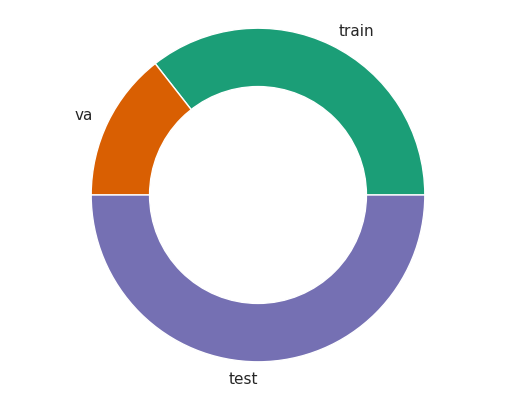

In [29]:
label = ["train","va","test"]

plt.pie(n, labels=label)
plt.gca().add_artist(plt.Circle((0, 0), 0.65, color='white'))
plt.axis('equal')

### Теперь снова разобъём данные, переведя их в нужные переменные, используя колонку 'set'

In [30]:
train_fit = pd.DataFrame()
train_fit = data_all.loc[data_all.set == "train"]

train_fit_x = train_fit.drop(columns = "y")
train_fit_x = train_fit_x.drop(columns = "set")
train_fit_y = train_fit.y


va_fit = pd.DataFrame()
va_fit = data_all.loc[data_all.set == "va"]

va_fit_x = va_fit.drop(columns = "y")
va_fit_x = va_fit_x.drop(columns = "set")
va_fit_y = va_fit.y


test_fit = pd.DataFrame()
test_fit = data_all.loc[data_all.set == "test"]

test_fit_x = test_fit.drop(['y', 'set'], axis=1)

In [32]:
pip install lightgbm

### LightGBM

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, roc_auc_score

In [32]:
%%time
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score

categorical_features = ['X0','X1','X2','X3','X4','X5','X6','X8']

# Parameter setting
params = {
    "objective" : "regression",
    "metric" : "rmse",
    "num_leaves" : 40,
    "learning_rate" : 0.01,
    "bagging_fraction" : 0.8,
    "feature_fraction" : 0.8, # Use only 〇% of features
    "bagging_frequency" : 6,
    "bagging_seed" : 42,
    "verbosity" : -1, # Whether to display the progress during learning
    "seed": 42
}

train_lgb = lgb.Dataset(train_fit_x,
                        label=train_fit_y,
                        categorical_feature=categorical_features)

va_lgb = lgb.Dataset(va_fit_x,
                     label=va_fit_y,
                     categorical_feature=categorical_features)

evals_result = {}

model_lgb = lgb.train(params, train_set = train_lgb,
                  num_boost_round = 10000,
                  valid_sets=[train_lgb, va_lgb], 
                  early_stopping_rounds=200, 
                  verbose_eval=1000,
                  evals_result=evals_result)

Training until validation scores don't improve for 200 rounds.
Early stopping, best iteration is:
[303]	training's rmse: 7.25229	valid_1's rmse: 7.42398
CPU times: user 3.38 s, sys: 116 ms, total: 3.5 s
Wall time: 1.85 s


In [33]:
va_y = va_fit_y

pred = model_lgb.predict(va_fit_x, num_iteration=model_lgb.best_iteration)

columns = ["y"]
pred_d = pd.DataFrame(data=pred, columns = columns)

# RSMLE score
score_RMSLE = np.sqrt(mean_squared_log_error(va_y, pred_d["y"]))
print("---------------RMSLE-score----------------")
print(score_RMSLE)

# RSMLE score
score_R2 = r2_score(va_y, pred_d["y"])
print("---------------R2-score----------------")
score_R2

---------------RMSLE-score----------------
0.06962100950951841
---------------R2-score----------------


0.6015553289188639

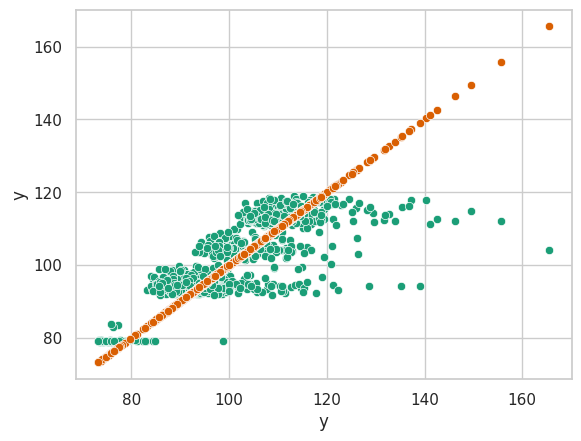

In [34]:
columns = ["y"]
va_fit_d = pd.DataFrame(data=va_y, columns = columns)
va_fit_d = va_fit_d.reset_index(drop=True)

sns.scatterplot(x=va_fit_d['y'], y=pred_d['y'])
sns.scatterplot(x=va_fit_d['y'], y=va_fit_d['y']) #perfect fitting line

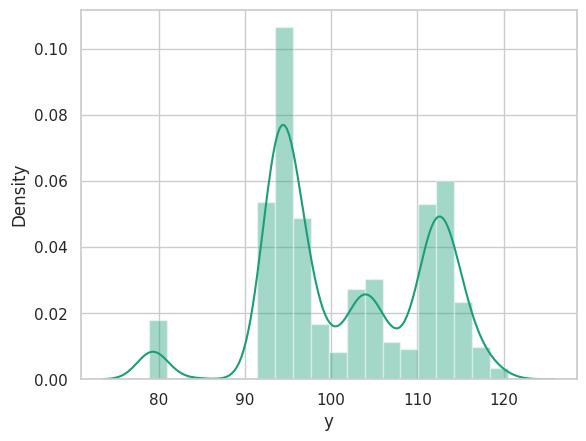

In [35]:
# predict
pred = model_lgb.predict(test_fit_x)

pred_df = pd.DataFrame()
pred_df["y"] = pred
sns.distplot(pred_df.y)

In [36]:
va_pred = model_lgb.predict(va_fit_x)
print('\nЦелевое значение в валидационной выборке, реальное, предсказанное и отклонение:')
pd.DataFrame({'True': va_fit_y.round(2), 'Predicted': va_pred.round(2), 'Deviation, %': (va_pred - va_fit_y)/va_fit_y}).round(2)


Целевое значение в валидационной выборке, реальное, предсказанное и отклонение:


,True,Predicted,"Deviation, %"
6005,88.54,95.43,0.08
6008,106.61,115.21,0.08
6009,92.66,92.83,0.00
6010,111.04,115.18,0.04
6013,99.64,98.45,-0.01
...,...,...,...
8405,107.39,113.26,0.05
8406,108.77,112.43,0.03
8412,109.22,112.22,0.03
8415,87.48,93.66,0.07


In [37]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(va_fit_y, va_pred).round(4))
print('MAE:', mean_absolute_error(va_fit_y, va_pred).round(4))


Метрики модели:

MSE: 55.1155
MAE: 5.6294


### AdaBoostRegressor

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
from sklearn.ensemble import AdaBoostRegressor

In [41]:
params = {  'base_estimator': [LinearRegression()],
            'n_estimators': list(range(5,100,1)), 
            'learning_rate': [0.001, 0.01, 0.1, 1, 10],
            'loss': ['linear','square','exponential'],
            'random_state': [0]}

ABR = RandomizedSearchCV(AdaBoostRegressor(), params, cv = 10, n_jobs=-1, n_iter=10)
ABR = ABR.fit(train_fit_x, train_fit_y).best_estimator_

Оптимальные гиперпараметры после рандомного поиска нашей модели:

In [42]:
ABR

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=0.01, loss='exponential', n_estimators=9,
                  random_state=0)

In [43]:
va_pred = ABR.predict(va_fit_x)
print('\nЦелевое значение в валидационной выборке, реальное, предсказанное и отклонение:')
pd.DataFrame({'True': va_fit_y.round(2), 'Predicted': va_pred.round(2), 'Deviation, %': (va_pred - va_fit_y)/va_fit_y}).round(2)


Целевое значение в валидационной выборке, реальное, предсказанное и отклонение:


,True,Predicted,"Deviation, %"
6005,88.54,94.90,0.07
6008,106.61,110.87,0.04
6009,92.66,94.47,0.02
6010,111.04,116.03,0.04
6013,99.64,97.23,-0.02
...,...,...,...
8405,107.39,105.49,-0.02
8406,108.77,109.23,0.00
8412,109.22,111.91,0.02
8415,87.48,93.64,0.07


In [44]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(va_fit_y, va_pred).round(4))
print('MAE:', mean_absolute_error(va_fit_y, va_pred).round(4))


Метрики модели:

MSE: 61.8301
MAE: 5.98


### KNeighborsRegressor

In [45]:
from sklearn.neighbors import DistanceMetric

In [46]:
from sklearn.neighbors import KNeighborsRegressor

In [47]:
from sklearn.model_selection import StratifiedShuffleSplit

In [48]:
params = {   'n_neighbors': list(range(3,30,1)),
             'weights': ['uniform', 'distance'],
             'algorithm': ['brute'],
             'leaf_size': list(range(5,50,1)),
             'p': [1, 2],
             'metric': ['euclidian','manhattan','chebyshev','minkowski']}
  
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

KNR = RandomizedSearchCV(KNeighborsRegressor(), params, n_jobs=-1,  random_state=0, n_iter=10)
KNR = KNR.fit(train_fit_x, train_fit_y).best_estimator_

Оптимальные гиперпараметры после рандомного поиска нашей модели:

In [49]:
KNR

KNeighborsRegressor(algorithm='brute', leaf_size=35, metric='manhattan',
                    metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                    weights='distance')

Для оптимальных гиперпараметров модели оценим качество:

In [50]:
va_pred = KNR.predict(va_fit_x)
print('\nЦелевое значение в валидационной выборке, реальное, предсказанное и отклонение:')
pd.DataFrame({'True': va_fit_y.round(2), 'Predicted': va_pred.round(2), 'Deviation, %': (va_pred - va_fit_y)/va_fit_y}).round(2)


Целевое значение в валидационной выборке, реальное, предсказанное и отклонение:


,True,Predicted,"Deviation, %"
6005,88.54,96.15,0.09
6008,106.61,104.54,-0.02
6009,92.66,100.11,0.08
6010,111.04,100.58,-0.09
6013,99.64,99.42,-0.00
...,...,...,...
8405,107.39,104.27,-0.03
8406,108.77,98.68,-0.09
8412,109.22,102.71,-0.06
8415,87.48,100.73,0.15


In [51]:
print('\nМетрики модели:\n')
print('MSE:', mean_squared_error(va_fit_y, va_pred).round(4))
print('MAE:', mean_absolute_error(va_fit_y, va_pred).round(4))


Метрики модели:

MSE: 116.7257
MAE: 8.6657


### AutoML - подход

In [1]:
# install newest changes from dev branch
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@dev

In [2]:
import pandas as pd
from supervised.automl import AutoML

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [3]:
sub = pd.read_csv("/content/drive/My Drive/Colab Notebooks/otus/MLA/AutoML/sample_submission.csv.zip")
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/otus/MLA/AutoML/test.csv.zip")
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/otus/MLA/AutoML/train.csv.zip")

In [4]:
x_cols = [f for f in train.columns if "X" in f]

In [9]:
automl = AutoML(
    total_time_limit=10 * 60,
    optuna_time_budget=180,
    mode="Optuna",
    eval_metric="r2",
)

automl.fit(train[x_cols], train["y"])

AutoML directory: AutoML_5
Expected computing time:
Total training time: Optuna + ML training = 1680 seconds
Total Optuna time: len(algorithms) * optuna_time_budget = 1080 seconds
Total ML model training time: 600 seconds
The task is regression with evaluation metric r2
AutoML will use algorithms: ['Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network']
AutoML will stack models
AutoML will ensemble availabe models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 6 models


[I 2021-07-10 13:52:27,513] A new study created in memory with name: no-name-8ff09d29-d631-4b39-a3f6-a97dbdc264e0


Optuna optimizes LightGBM with time budget 180 seconds eval_metric r2 (maximize)


[I 2021-07-10 13:52:28,143] Trial 0 finished with value: 0.5720831333290013 and parameters: {'learning_rate': 0.1, 'num_leaves': 1598, 'lambda_l1': 2.840098794801191e-06, 'lambda_l2': 3.0773599420974e-06, 'feature_fraction': 0.8613105322932351, 'bagging_fraction': 0.970697557159987, 'bagging_freq': 7, 'min_data_in_leaf': 36, 'extra_trees': False, 'cat_l2': 71.270202701163, 'cat_smooth': 37.02507548533699}. Best is trial 0 with value: 0.5720831333290013.
[I 2021-07-10 13:52:28,603] Trial 1 finished with value: 0.5783160430083466 and parameters: {'learning_rate': 0.1, 'num_leaves': 1808, 'lambda_l1': 1.922975960679387e-05, 'lambda_l2': 0.0034559353208953327, 'feature_fraction': 0.352766869903896, 'bagging_fraction': 0.5581768078896221, 'bagging_freq': 7, 'min_data_in_leaf': 66, 'extra_trees': False, 'cat_l2': 31.683612223718768, 'cat_smooth': 56.80986526692593}. Best is trial 1 with value: 0.5783160430083466.
[I 2021-07-10 13:52:30,881] Trial 2 finished with value: 0.5508622703906647 and

1_Optuna_LightGBM r2 0.563876 trained in 11.49 seconds


[I 2021-07-10 13:55:55,463] A new study created in memory with name: no-name-91076c27-1bed-4ae8-a92f-ff29cf6f1e13


Optuna optimizes Xgboost with time budget 180 seconds eval_metric r2 (maximize)


[I 2021-07-10 13:55:56,814] Trial 0 finished with value: 0.583892659500414 and parameters: {'eta': 0.1, 'max_depth': 10, 'lambda': 2.840098794801191e-06, 'alpha': 3.0773599420974e-06, 'colsample_bytree': 0.8613105322932351, 'subsample': 0.970697557159987, 'min_child_weight': 88}. Best is trial 0 with value: 0.583892659500414.
[I 2021-07-10 13:55:58,106] Trial 1 finished with value: 0.5745747568161492 and parameters: {'eta': 0.1, 'max_depth': 6, 'lambda': 0.0011239983523033718, 'alpha': 0.0003370920325799477, 'colsample_bytree': 0.30963791485116204, 'subsample': 0.8409786428569279, 'min_child_weight': 89}. Best is trial 0 with value: 0.583892659500414.
[I 2021-07-10 13:56:00,468] Trial 2 finished with value: 0.5804093404515295 and parameters: {'eta': 0.025, 'max_depth': 12, 'lambda': 0.007284559400814385, 'alpha': 3.7568443272922285e-05, 'colsample_bytree': 0.8521111079458232, 'subsample': 0.521785288686571, 'min_child_weight': 57}. Best is trial 0 with value: 0.583892659500414.
[I 2021

2_Optuna_Xgboost r2 0.572465 trained in 50.32 seconds
* Step ensemble will try to check up to 1 model
Ensemble r2 0.572465 trained in 0.26 seconds
Skip stack because no parameters were generated.
Skip ensemble_stacked because no parameters were generated.
AutoML fit time: 446.95 seconds
AutoML best model: 2_Optuna_Xgboost


AutoML(eval_metric='r2', mode='Optuna', optuna_time_budget=180,
       total_time_limit=600)

In [10]:
automl.report()

Output hidden; open in https://colab.research.google.com to view.

## Есть другие AutoML подходы (не запускал)

In [ ]:
!pip install h2o

In [58]:
from h2o.automl import H2OAutoML

In [59]:
import h2o

In [ ]:
#h2o.connect()

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
x = train.columns
y = "response"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

aml.leader

In [ ]:
train_fit = pd.DataFrame()
train_fit = data_all.loc[data_all.set == "train"]

train_fit_x = train_fit.drop(columns = "y")
train_fit_x = train_fit_x.drop(columns = "set")
train_fit_y = train_fit.y


va_fit = pd.DataFrame()
va_fit = data_all.loc[data_all.set == "va"]

va_fit_x = va_fit.drop(columns = "y")
va_fit_x = va_fit_x.drop(columns = "set")
va_fit_y = va_fit.y


test_fit = pd.DataFrame()
test_fit = data_all.loc[data_all.set == "test"]

test_fit_x = test_fit.drop(['y', 'set'], axis=1)

In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Import a sample binary outcome train/test set into H2O
#train = #h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
#test = #h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# Identify predictors and response
#x = train.columns
#y = "response"
#x.remove(y)

# For binary classification, response should be a factor
#train[y] = train[y].asfactor()
#test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=va_fit_x.columns, y=va_fit_y, training_frame=va_fit)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

aml.leader

In [ ]:
!pip install gama --user

In [ ]:
from gama import GamaClassifier

gaml = GamaClassifier(scoring='roc_auc', max_total_time=100, store="nothing", n_jobs=-1)


gaml.fit(train_fit_x, train_fit_y) #pipeline_optimizer.fit(X_train, y_train)

va_pred = gaml.predict_proba(va_fit_x)[:, 1] #preds = pipeline_optimizer.predict_proba(X_test)[:, 1]

print(roc_auc_score(va_fit_x, va_pred)) #print(roc_auc_score(y_test, preds))

#gaml.fit(X_train.values, y_train)

#preds = gaml.predict_proba(X_test.values)[:, 1]

#print(roc_auc_score(y_test, preds))

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier
#from sklearn.datasets import load_digits
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#import pandas as pd

#path = "/Users/maxim/projects/otus/self_advanced_ml/kaggle_classification/data/UCI_Credit_Card.csv"
#train_df = pd.read_csv(path, low_memory=False)
#target = train_df['default.payment.next.month']
#train_df = train_df.drop(['default.payment.next.month', 'ID'], axis=1)

#X_train, X_test, y_train, y_test = train_test_split(
#    train_df,
#    target.values,
#    test_size=.3,
#    random_state=2020,
#    stratify=target
#)

pipeline_optimizer = TPOTClassifier(
    generations=2,
    population_size=2,
    cv=4,
    random_state=42,
    verbosity=2
)
pipeline_optimizer.fit(train_fit_x, train_fit_y) #pipeline_optimizer.fit(X_train, y_train)

va_pred = pipeline_optimizer.predict_proba(va_fit_x)[:, 1] #preds = pipeline_optimizer.predict_proba(X_test)[:, 1]

print(roc_auc_score(va_fit_x, va_pred)) #print(roc_auc_score(y_test, preds))


Generation 1 - Current best internal CV score: -inf


Пробывал менять параметры, не получается отработать.

In [ ]:
# !pip install -q -U git+https://github.com/mljar/mljar-supervised.git@dev

In [ ]:
!pip install AutoML # --user #--use-feature=2020-resolver

In [ ]:
import AutoML

In [ ]:
automl = AutoML(
    total_time_limit=48 * 3600,
    optuna_time_budget=1800,
    mode="Optuna",
    eval_metric="r2",
)

automl.fit(train_fit_x, train_fit_y)

va_pred = automl.predict_proba(va_fit_x)[:, 1] 

print(roc_auc_score(va_fit_x, va_pred))

In [ ]:
pipeline_optimizer = TPOTClassifier(
    generations=5,
    population_size=20,
    cv=5,
    random_state=42,
    verbosity=2,
    use_dask=True,
    n_jobs=-1
)
pipeline_optimizer.fit(train_fit_x, train_fit_y)

#preds = pipeline_optimizer.predict_proba(X_test)[:, 1] 

print(roc_auc_score(y_test, preds))